In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

import numpy as np 
import torch
import torchvision
import matplotlib.pyplot as plt
from collections import defaultdict
import glob

import datasets.mnist as mnist
import datasets.cifar10 as cifar10
import constants
from configuration import Configuration

from util import *

import nb_util
from importlib import reload

In [2]:
cifar_dir = '/scratch/gp491/wandb/checkpoints/cifar10-moe'
baseline_dirs = list([f'/scratch/gp491/wandb/checkpoints/cifar10-baseline{s}' for s in ['', '-10', '-2137']])

In [3]:
cifar_res = defaultdict(list)

for d in baseline_dirs + [cifar_dir]:
    paths =  glob.glob(f'{d}/*')
    for path in paths:
        try:
            res = nb_util.CIFARRunData(path)
            res.get_metric_shifted(*nb_util.METRIC_NAMES[2])
            if 'reg' in res.name or d in baseline_dirs:
                cifar_res[res.name].append(res)
        except:
            pass

In [4]:
cifar_res_comb = {}
for key, value in cifar_res.items():
    cifar_res_comb[key] = nb_util.CIFARMultiRunData(value)

In [5]:
baselines = [cifar_res_comb['single'], cifar_res_comb['ens-5']]

In [6]:
ens_loss = list([rd for key, rd in cifar_res_comb.items() if 'ens-loss' in rd.name and 'mcd' not in rd.name ])
sum_loss = list([rd for key, rd in cifar_res_comb.items() if 'sum-loss' in rd.name and 'mcd' not in rd.name ])

In [7]:
for rd in sum_loss:
    print(rd.name)

sum-loss-reg-0.1-gate-conv
sum-loss-reg-0.1-gate-same
sum-loss-reg-0.1-gate-simple


In [8]:
nb_util = reload(nb_util)

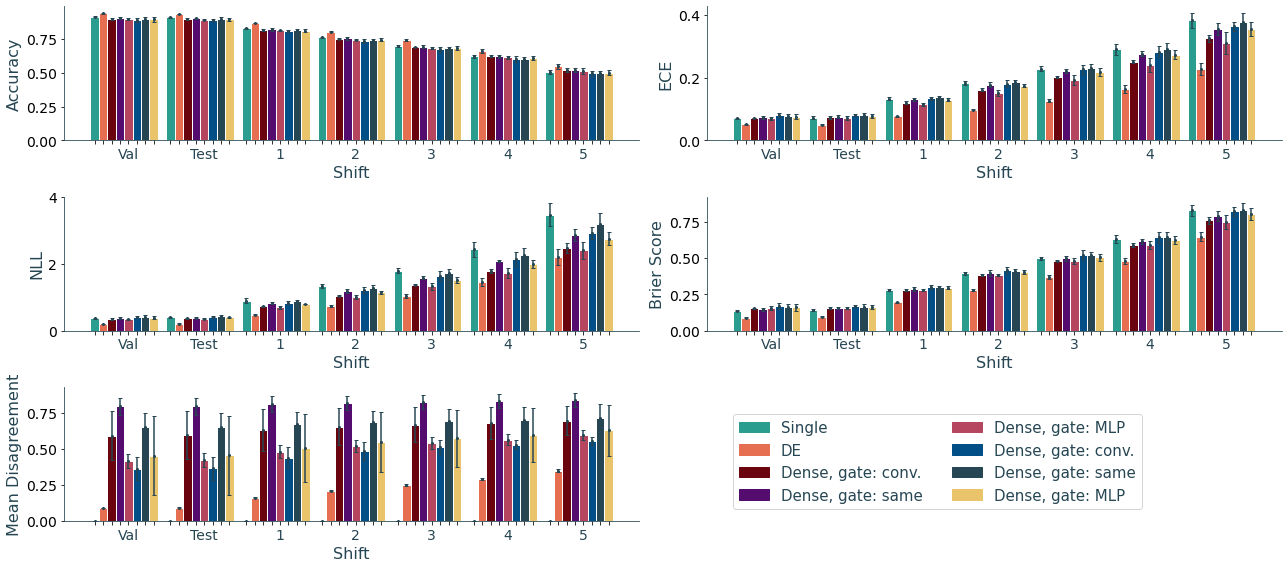

In [11]:
fig, axs = plt.subplots(3, 2, figsize = (18, 8))
shift = 5
for ax, i in zip(axs.flatten(), [0, 3, 4, 5, 2]):
    legend = i == 2
    labels = nb_util.plot_single_metric_error_bar_cifar(
        ax, 
        baselines + ens_loss + sum_loss, 
        *nb_util.METRIC_NAMES[i], 
        x_label='Shift', 
        y_label=nb_util.METRIC_LABELS[i], 
        legend=legend, 
        legend_col=2, 
        legend_bbox=(1.15, 0.85), 
        fontsize=16)
# fig.suptitle(f'Dataset Rotation {labels[shift]}'+'$^{\circ}$', fontsize=15, color=dark_greeen)
fig.delaxes(axs[2,1])
fig.tight_layout()

([1, 2, 3, 4, 5], <matplotlib.legend.Legend at 0x7f2100a22970>)

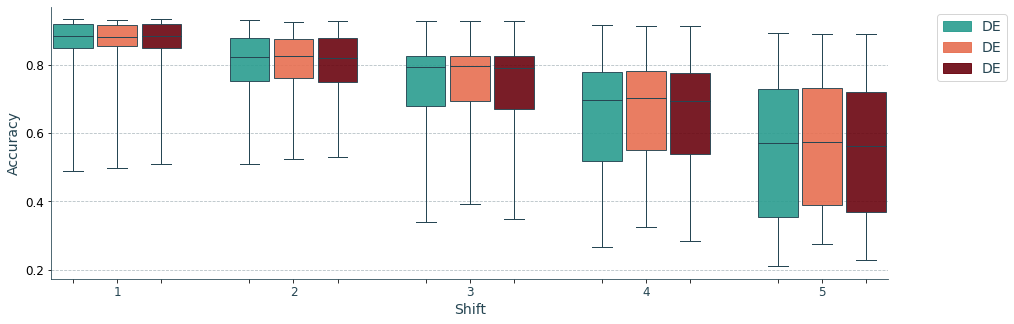

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
m=0
# plot_single_metric_boxplot(ax, [r.runs[0 if '100' not in r.name else 2] for r in cifar10_baselines_and_best], *METRIC_NAMES[m], y_label=METRIC_LABELS[m], legend=True, legend_in_layout=True, include_id=False)
nb_util.plot_single_metric_boxplot_cifar(ax, cifar_res['ens-5'], *nb_util.METRIC_NAMES[m], y_label=nb_util.METRIC_LABELS[m], legend=True, legend_in_layout=True, include_id=False)

['Val', 'Test', 1, 2, 3, 4, 5]


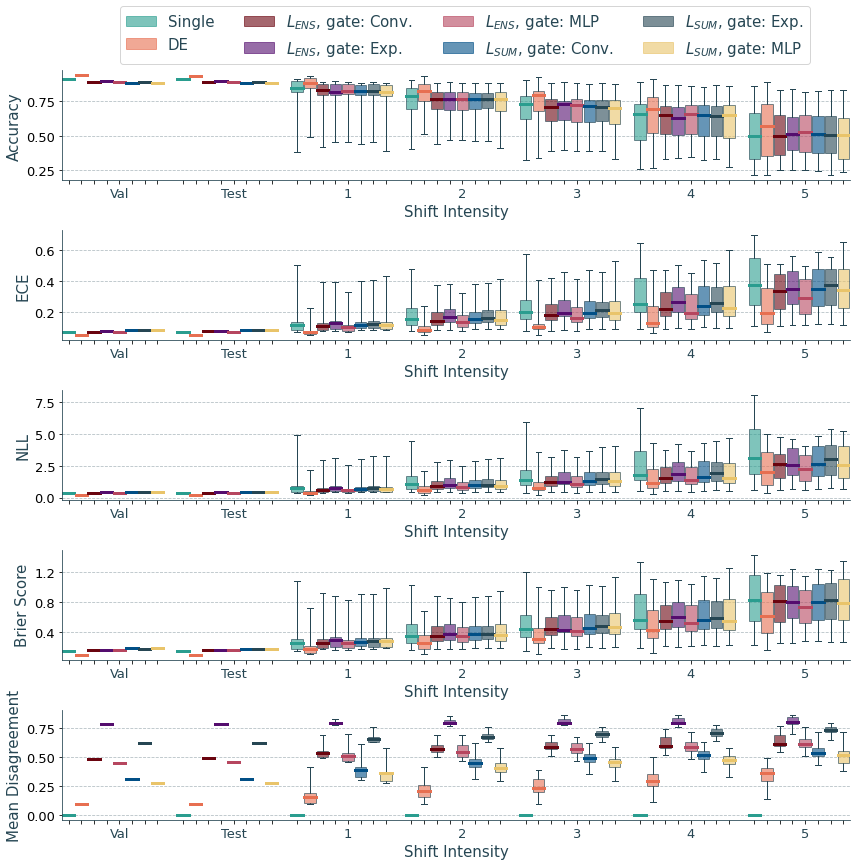

In [19]:
fig, axs = plt.subplots(5, 1, figsize=(12, 2.25*5))
m=3
for ax, m in zip(axs.flatten(), [0, 3, 4, 5, 2]):
    ls, leg = nb_util.plot_single_metric_boxplot_cifar(
        ax, 
        [r.runs[0] for r in baselines + ens_loss + sum_loss], 
        *nb_util.METRIC_NAMES[m], 
        y_label=nb_util.METRIC_LABELS[m], 
        x_label='Shift Intensity',
        legend=m==2, 
        legend_in_layout=True, 
        alpha=0.6, 
        include_id=True,
        legend_bbox=(0.95,1.075),
        legend_col=4,
        fig=fig,
        fontsize=15)
    fig.tight_layout()
print(ls)
fig.savefig('imgs/cifar10_moe_baseline.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
#

In [9]:
ens_loss_mcd = list([rd for key, rd in cifar_res_comb.items() if 'ens-loss' in rd.name and 'mcd' in rd.name and 'sparse' not in rd.name])
sum_loss_mcd = list([rd for key, rd in cifar_res_comb.items() if 'sum-loss' in rd.name and 'mcd' in rd.name and 'sparse' not in rd.name])

In [10]:
sum_loss_conv_mcd = list([rd for rd in sum_loss_mcd if 'conv' in rd.name])
sum_loss_same_mcd = list([rd for rd in sum_loss_mcd if 'lenet' in rd.name])
sum_loss_mlp_mcd = list([rd for rd in sum_loss_mcd if 'simple' in rd.name])

sum_loss_mcd01 = list([rd for rd in sum_loss_mcd if '0.1' == rd.name[-3:]])
sum_loss_mcd05 = list([rd for rd in sum_loss_mcd if '0.5' == rd.name[-3:]])
sum_loss_mcd09 = list([rd for rd in sum_loss_mcd if '0.9' == rd.name[-3:]])

ens_loss_conv_mcd = list([rd for rd in ens_loss_mcd if 'conv' in rd.name])
ens_loss_same_mcd = list([rd for rd in ens_loss_mcd if 'lenet' in rd.name])
ens_loss_mlp_mcd = list([rd for rd in ens_loss_mcd if 'simple' in rd.name])

ens_loss_mcd01 = list([rd for rd in ens_loss_mcd if '0.1' == rd.name[-3:]])
ens_loss_mcd05 = list([rd for rd in ens_loss_mcd if '0.5' == rd.name[-3:]])
ens_loss_mcd09 = list([rd for rd in ens_loss_mcd if '0.9' == rd.name[-3:]])

In [11]:
for rd in ens_loss_conv_mcd:
    print(rd.name)

ens-loss-reg-0.1-gate-mcd_conv-0.1
ens-loss-reg-0.1-gate-mcd_conv-0.5
ens-loss-reg-0.1-gate-mcd_conv-0.9


In [14]:
names_mcd = ['Single', 'DE', 'Base MoE', '$p=0.1$', '$p=0.5$', '$p=0.9$']

['Val', 'Test', 1, 2, 3, 4, 5]


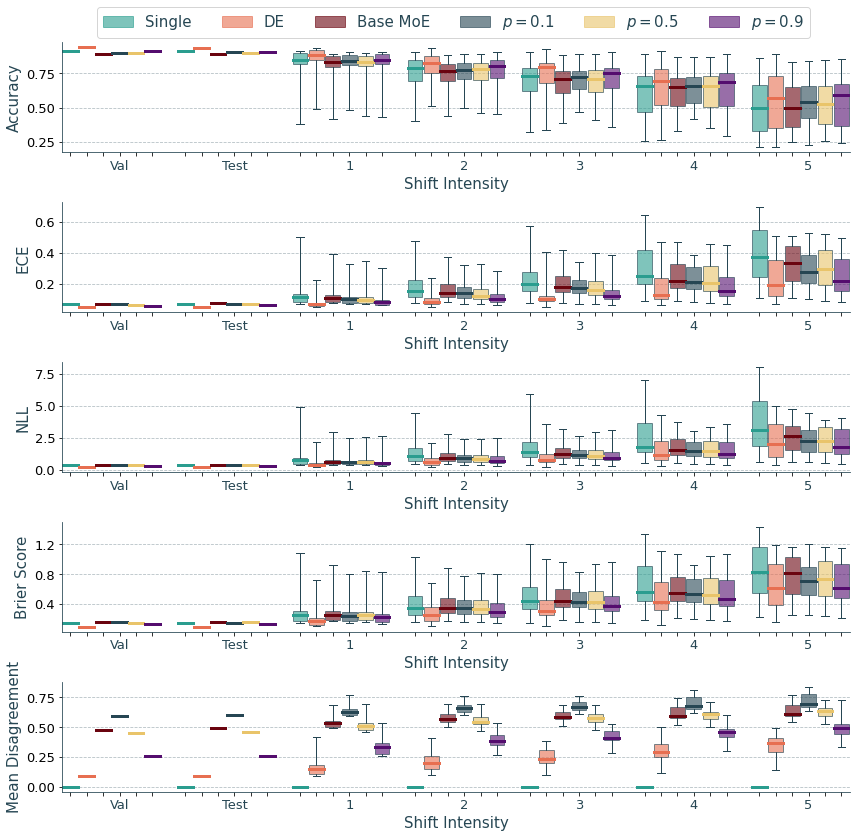

In [30]:
fig, axs = plt.subplots(5, 1, figsize=(12, 2.25*5))
m=3
for ax, m in zip(axs.flatten(), [0, 3, 4, 5, 2]):
    ls, leg = nb_util.plot_single_metric_boxplot_cifar(
        ax, 
        [r.runs[0] for r in baselines + [cifar_res_comb['ens-loss-reg-0.1-gate-conv']] + ens_loss_conv_mcd ], 
        *nb_util.METRIC_NAMES[m], 
        y_label=nb_util.METRIC_LABELS[m], 
        x_label='Shift Intensity',
        legend=m==2, 
        legend_in_layout=True, 
        alpha=0.6, 
        include_id=True,
        legend_bbox=(0.95,1.04),
        legend_col=6,
        fig=fig,
        fontsize=15,
        leg_names=names_mcd)
    fig.tight_layout()
print(ls)
fig.savefig('imgs/cifar10_moe_mcd.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')

In [23]:
la_name = 'ens-loss-reg-0.1-gate-conv'

la_res = defaultdict(list)

paths =  glob.glob(f'/scratch/gp491/wandb/checkpoints/cifar10-moe-laplace/*')
for path in paths:
    # try:
    if 'sparse' not in path and "1.0" not in path:
        res = nb_util.CIFARRunData(path)
        res.name = f'{res.name}-{path.split("-")[-1]}'
        la_res[res.name].append(res)
    # except:
    #     pass

la_res_comb = {}
for key, value in la_res.items():
    la_res_comb[key] = nb_util.CIFARMultiRunData(value)

In [24]:
la_rds = [cifar_res_comb[la_name]] + list(reversed(list(la_res_comb.values())))

In [26]:
names = ['Base MoE',  f'$\gamma^2 = {0.1}$',  f'$\gamma^2 = {1}$', f'$\gamma^2 = {2}$',  f'$\gamma^2 = {10}$', f'$\gamma^2 = {100}$']
for rd, name in zip(la_rds, names):
    print(rd.name, name)

ens-loss-reg-0.1-gate-conv Base MoE
ens-loss-reg-0.1-gate-simple-LLP-10-10 $\gamma^2 = 0.1$
ens-loss-reg-0.1-gate-simple-LLP-1-1 $\gamma^2 = 1$
ens-loss-reg-0.1-gate-simple-LLP-0.5-0.5 $\gamma^2 = 2$
ens-loss-reg-0.1-gate-simple-LLP-0.1-0.1 $\gamma^2 = 10$
ens-loss-reg-0.1-gate-simple-LLP-0.01-0.01 $\gamma^2 = 100$


['Val', 'Test', 1, 2, 3, 4, 5]


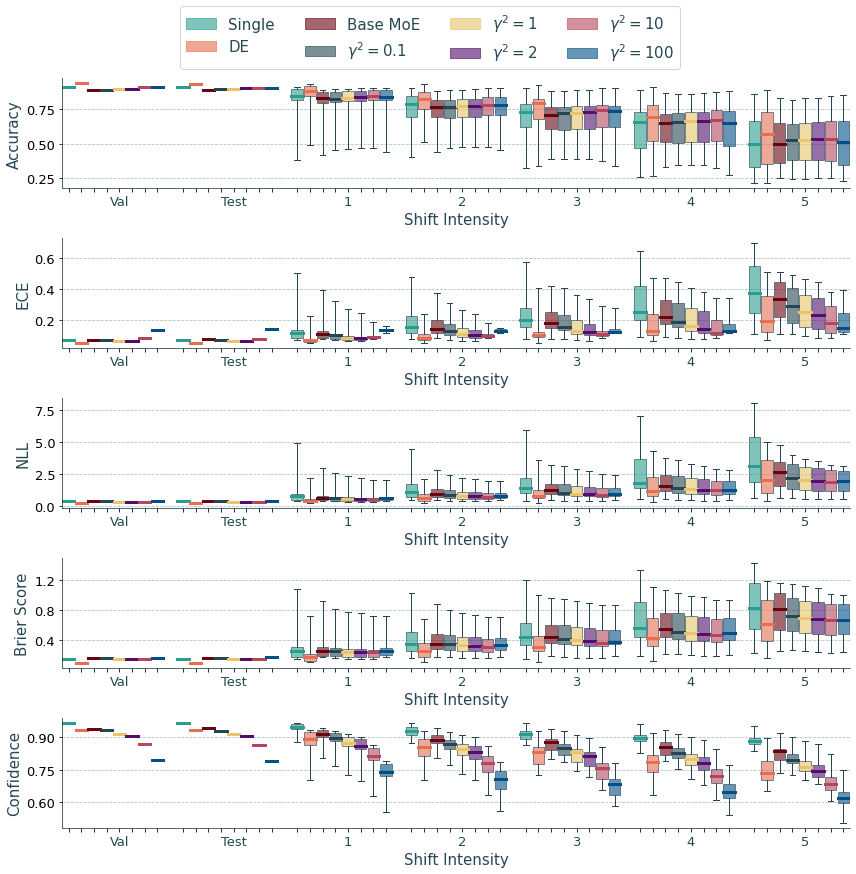

In [35]:
fig, axs = plt.subplots(5, 1, figsize=(12, 2.25*5))
m=3
for ax, m in zip(axs.flatten(), [0, 3, 4, 5, 1]):
    ls, leg = nb_util.plot_single_metric_boxplot_cifar(
        ax, 
        [r.runs[0] for r in baselines + la_rds ], 
        *nb_util.METRIC_NAMES[m], 
        y_label=nb_util.METRIC_LABELS[m], 
        x_label='Shift Intensity',
        legend=m==1, 
        legend_in_layout=True, 
        alpha=0.6, 
        include_id=True,
        legend_bbox=(0.8,1.085),
        legend_col=4,
        fig=fig,
        fontsize=15,
        leg_names=['Single', 'DE'] + names)
    fig.tight_layout()
print(ls)
fig.savefig('imgs/cifar10_moe_la.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')